<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#[ELE-083]-Evolutionary-computation:-N-queens-problem" data-toc-modified-id="[ELE-083]-Evolutionary-computation:-N-queens-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>[ELE 083] Evolutionary computation: N-queens problem</a></span><ul class="toc-item"><li><span><a href="#Notebook-structure" data-toc-modified-id="Notebook-structure-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notebook structure</a></span></li></ul></li><li><span><a href="#Part-1:-step-by-step-on-functions" data-toc-modified-id="Part-1:-step-by-step-on-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 1: step-by-step on functions</a></span><ul class="toc-item"><li><span><a href="#Setting-up" data-toc-modified-id="Setting-up-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Setting up</a></span><ul class="toc-item"><li><span><a href="#Loading-libraries-and-support-functions" data-toc-modified-id="Loading-libraries-and-support-functions-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Loading libraries and support functions</a></span></li><li><span><a href="#Algorithm-parameters" data-toc-modified-id="Algorithm-parameters-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Algorithm parameters</a></span></li></ul></li><li><span><a href="#Problem-representation" data-toc-modified-id="Problem-representation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Problem representation</a></span></li><li><span><a href="#Initializing-the-algorithm" data-toc-modified-id="Initializing-the-algorithm-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Initializing the algorithm</a></span></li><li><span><a href="#Solution-evaluation" data-toc-modified-id="Solution-evaluation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Solution evaluation</a></span></li><li><span><a href="#Function-rate_generation" data-toc-modified-id="Function-rate_generation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Function <code>rate_generation</code></a></span></li><li><span><a href="#Breed-children:-function-breed" data-toc-modified-id="Breed-children:-function-breed-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Breed children: function <code>breed</code></a></span></li><li><span><a href="#Next-generation-function:-next_generation" data-toc-modified-id="Next-generation-function:-next_generation-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Next generation function: <code>next_generation</code></a></span></li><li><span><a href="#Final-function:-solve_n_queens_problem" data-toc-modified-id="Final-function:-solve_n_queens_problem-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Final function: <code>solve_n_queens_problem</code></a></span></li></ul></li><li><span><a href="#Part-2:-solving-the-n-queens-problem" data-toc-modified-id="Part-2:-solving-the-n-queens-problem-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Part 2: solving the n-queens problem</a></span><ul class="toc-item"><li><span><a href="#n-=-8" data-toc-modified-id="n-=-8-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>n = 8</a></span></li><li><span><a href="#n-=-20" data-toc-modified-id="n-=-20-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>n = 20</a></span></li><li><span><a href="#n-=-50" data-toc-modified-id="n-=-50-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>n = 50</a></span></li><li><span><a href="#n-=-100" data-toc-modified-id="n-=-100-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>n = 100</a></span></li></ul></li></ul></div>

# [ELE 083] Evolutionary computation: N-queens problem

- Hernane Braga Pereira - 2014112627

__Problem statement:__

Project a evolutionary algorithm to solve the n-queens problem. The N Queen is the problem of placing N chess queens on an N×N chessboard so that no two queens attack each other. For example, following is a representantion for 8 Queen problem:

![Ilustração do problema das N­Rainhas com um tabuleiro 8x8.](https://miro.medium.com/max/875/1*tXuUHNvFZpw7K75GcbGrKQ.png)

---
##  Notebook structure

This notebook is divided in two parts:
1. A step-by-step demonstration of each part of the solving algorithm
2. Using the algorithm in different test scenarios.
---

# Part 1: step-by-step on functions

In this sections the following topics will be presented:

1. Setting up
1. Problem representation
2. Initialising alghorithm (`initialise_population`)
3. Evaluating conflicts at the board (`rate_solution`)
4. Rating generation (`rate_generation`)
4. Breeding function (`breed`)
5. Chosen next generation (`next_generation`)
6. Solving the N-queens problem (`solve_n_queens_problem`)



## Setting up



### Loading libraries and support functions

In [1]:
import numpy as np
import math
import pandas
import matplotlib.pyplot as plt
from matplotlib.table import Table

__Function to plot solution as chess board__


In [2]:
def plot_solution(solution):
  # Function adapted from: https://stackoverflow.com/questions/10194482/custom-matplotlib-plot-chess-board-like-table-with-colored-cells
    board_size = solution.shape[0]
    board = np.zeros(shape=(board_size, board_size))
    for j in range(board_size):
        for i in range(board_size):
            if(i == solution[j]):
                board[i, j] = '1'
    
    data = pandas.DataFrame(board, columns=range(board_size))
    data.replace({0: ' ', 1: 'Q'}, inplace=True)
    checkerboard_table(data)
    plt.show()

def checkerboard_table(data, fmt='{}', bkg_colors=['silver', 'white']):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0,0,1,1])

    nrows, ncols = data.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(data):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = bkg_colors[idx]

        tb.add_cell(i, j, width, height, text=fmt.format(val), 
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(data.index):
        tb.add_cell(i, -1, width, height, text=label, loc='right', 
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(data.columns):
        tb.add_cell(-1, j, width, height/2, text=label, loc='center', 
                           edgecolor='none', facecolor='none')
    ax.add_table(tb)
    return fig

### Algorithm parameters

The following paremeters must be defined:
- Number of queens: `board_size`
- Mutation chance: `mutation_chance`
- Initial population size: `population_size`
- Max iterations allowed: `generations`
- Crossover point for children: `crossover_point`
- Children number per generation : `children_number`

In [3]:
board_size = 8
mutation_chance = 0.8
population_size = 6
generations = 10 
crossover_point = 3
children_number = 4

## Problem representation

For problem-solving, we'll represent the candidate solution as a vector of N positions. Each position represents a row of the chessboard, and the vector content has the chessboard column index.  An example is prsented in the image below:

<img src="https://miro.medium.com/max/2800/1*pDIWPCG_we-0sqrr36sSZQ.jpeg" alt="Drawing" style="width: 320px;"/>

## Initializing the algorithm

The `initialise_population` function returns a matrix of size $ p $ $ x $ $ n $ where $ p $ is the number of candidate solutions in the population and $ n $ is the number of queens. They are filled with a permutation of the numbers from 1 to $ n $.

In [4]:
def initialise_population(population_size, board_size):
    """
    Initialise population with random solutions
        
    Arguments:
        population_size -- the size of population defined in the parameters
        board_size -- the board size and number of queens
        
    Returns:
        population -- a ndarray with randomly initialize solutions 
    """
    population = np.empty((population_size, board_size), int)

    for i in range(population_size):
        population[i, :] = np.random.permutation(board_size)
    
    return population

A initial solution given by the function:

Representation:  [5 3 2 4 6 1 7 0]


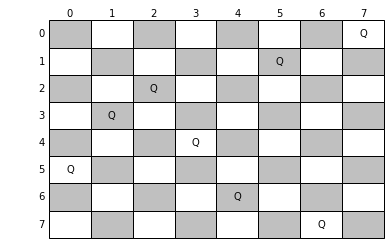

In [5]:
solutions = initialise_population(population_size, board_size)
print("Representation: ", solutions[0])
plot_solution(solutions[0])

## Solution evaluation

The `rate_solution` function returns the number of conflicts on the board. Due to the nature of the other functions and the solutions' representation, there will never be conflicts in the vertical axis.

In [6]:
def rate_solution(solution):
    """
    Return the number of conflicts given a solution 
    """
    count = 0
    
    # Check diagonal conflicts
    k = 0
    for i in range(len(solution)):
        k = i+1
        aux1 = solution[i]+1
        aux2 = solution[i]-1 
        while ((aux1 < len(solution) or aux2 >= 0) and k < len(solution)):
            if (solution[k] == aux1 or solution[k]==aux2):
                count +=1
            aux1 += 1
            aux2 -= 1
            k += 1
    return count

Example:

Number of conflicts:  4


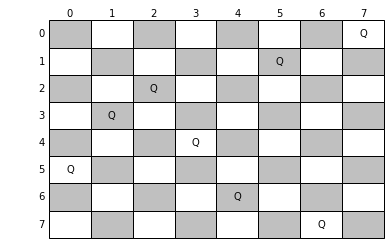

In [7]:
conflicts_example = rate_solution(solutions[0])
print("Number of conflicts: ", conflicts_example)
plot_solution(solutions[0])

## Function `rate_generation`

1. Receive the candidate solutions.
2. Calculate the number of conflicts for each one.
3. Returns the matrix of solutions ordered by the number of conflicts.

In [8]:
def rate_generation(solutions):
    """
    Return the solutions ndarray sorted in ascending by the number of conflicts  
    """
    population_size = solutions.shape[0]
    conflicts = np.empty((population_size, 2), dtype=int)
    conflicts[:, 0] = np.arange(population_size)
    for i in range(population_size):
        conflicts[i, 1] = rate_solution(solutions[i, :])
    
    # Sorting solutions by number of conflicts
    conflicts_sorted = conflicts[conflicts[:,1].argsort()]
    solutions_sorted = solutions[conflicts_sorted[:, 0], :]

    return solutions_sorted, conflicts_sorted

Example:

In [9]:
print("Solutions: \n", solutions)

sorted_solutions, conflicts_sorted = rate_generation(solutions)
print("\nConflicts sorted: \n[idx, conflicts]\n", conflicts_sorted)
print("\nSolutions sorted: \n", sorted_solutions)

Solutions: 
 [[5 3 2 4 6 1 7 0]
 [2 5 6 1 0 3 4 7]
 [5 0 2 1 7 3 4 6]
 [3 4 1 7 5 6 0 2]
 [1 5 2 4 3 6 7 0]
 [3 6 4 0 7 5 1 2]]

Conflicts sorted: 
[idx, conflicts]
 [[0 4]
 [3 4]
 [5 4]
 [2 5]
 [1 6]
 [4 9]]

Solutions sorted: 
 [[5 3 2 4 6 1 7 0]
 [3 4 1 7 5 6 0 2]
 [3 6 4 0 7 5 1 2]
 [5 0 2 1 7 3 4 6]
 [2 5 6 1 0 3 4 7]
 [1 5 2 4 3 6 7 0]]


## Breed children: function `breed`

A function that returns the breed of two solutions given the mutation chance, and a crossover point.

1. Analyzes the similarity between parents: positions that are the same are passed on. Those that are different receive a _flag_ of -1.

2. If parents A and B are identical or without any similarity, a crossover is applied, where the cutoff point $ x $ is specified by the variable `crossover_point,` its default value is 3:
     - Child A receives the first $ x $ values ​​from father A, and the rest are vector values ​​that are filled with _flag_ -1
     - Son B receives the first $ x $ values ​​as _flag_ -1, and the rest comes from father B.


3. The children are completed by traversing the vectors and checking if that position has a _flag_. If so, that position is filled by randomly choosing an element from the set of possible values. When selected, this element is removed from the collection of possibilities, thus avoiding repetition.

4. Mutation is applied to children based on a probability of occurrence given by the variable `mutation_chance.` The mutation is a permutation between the elements of the new vector.

5. The final check is made to ensure that child A is different from child B. If they are equal, child A receives the same crossover as specified in step 2.

In [10]:
def breed(parent_A, parent_B, mutation_chance, crossover_point=3):
    """
    Returns a numpy ndarray of 2 children

    Arguments:
        parent_A, parent_B -- the solutions candidate to breeding
        crossover_point -- point to cut solution if parents are identical of totally different
        mutation_chance -- chance of a child have mutation (between 0 and 1)
    """
    board_size = len(parent_A)
    children = np.empty((2, board_size), dtype=int)
    same_gene = 0
    set_A = set(np.arange(board_size))
    set_B = set(np.arange(board_size))

    # Checking same gene in parents
    for i in np.arange(board_size):
        if(parent_A[i] == parent_B[i]):
            gene = parent_A[i]
            children[0, i] = gene
            children[1, i] = gene
            set_A.remove(gene)
            set_B.remove(gene)
            same_gene +=1
        else:
            children[0, i] = -1
            children[1, i] = -1

    # if parent A is identical to parent B, then get the first 'crossover_point' numbers in each parent
    if(same_gene == board_size or same_gene == 0):
        set_A = set(np.arange(board_size))
        set_B = set(np.arange(board_size))
        
        # Child A
        children[0, 0:crossover_point] = parent_A[0:crossover_point]
        children[0, crossover_point:board_size] = -1
        set_A.difference_update(children[0, 0:crossover_point])

        # Child B
        children[1, crossover_point:board_size] = parent_B[crossover_point:board_size]
        children[1, 0:crossover_point] = -1
        set_B.difference_update(children[1, crossover_point:board_size])


    # Completing children with permutation
    for i in range(board_size):
        if(children[0, i] == -1):
            r = np.random.randint(len(set_A))
            new_gene = list(set_A)[r]
            children[0, i] = new_gene
            set_A.remove(new_gene)
        
        if(children[1, i] == -1):
            r = np.random.randint(len(set_B))
            new_gene = list(set_B)[r]
            children[1, i] = new_gene
            set_B.remove(new_gene)

    
    # Applying mutation: a randomly permutation on children indexes 
    # Chance of child B have mutation = mutation_chance*mutation_chance
    r = np.random.rand(1)
    if(r <= mutation_chance):
        position_1 = np.random.randint(board_size)
        position_2 = np.random.randint(board_size)
        children[1, position_1], children[1, position_2] = children[1, position_2], children[1, position_1]
        
        r = np.random.rand(1)
        if(r <= mutation_chance):
            position_1 = np.random.randint(board_size)
            position_2 = np.random.randint(board_size)
            children[0, position_1], children[0, position_2] = children[0, position_2], children[0, position_1]

            
    # Final check to make suse children are not igual. If so apply crossover using the crossover_point in child A
    if(np.array_equal(children[0], children[1])):
        set_A = set(np.arange(board_size))
        children[0, 0:crossover_point] = parent_A[0:crossover_point]
        children[0, crossover_point:board_size] = -1
        set_A.difference_update(children[0, 0:crossover_point])
        for i in range(board_size):
            if(children[0, i] == -1):
                r = np.random.randint(len(set_A))
                new_gene = list(set_A)[r]
                children[0, i] = new_gene
                set_A.remove(new_gene)
    
    return children

__Function use cases:__

- Parents with some similarity and no chance of mutation.
- Identical parents. 
- Completely different parents.


In [11]:
print("Parents with at least one equal gene and mutation_chance = 0:\n")
parent_A = np.array([0, 1, 2, 3, 4, 5, 6, 7])
parent_B = np.array([0, 7, 4, 3, 2, 6, 5, 1])

print("Parent A:", parent_A)
print("Parent B:",parent_B)
print("\nChildren: \n", breed(parent_A, parent_B, 0, crossover_point))


print("\n...............\nIdentical parents:\n")
parent_A = np.arange(board_size)
parent_B = np.arange(board_size)

print("Parent A:", parent_A)
print("Parent B:",parent_B)
print("\nChildren: \n", breed(parent_A, parent_B, mutation_chance, crossover_point))


print("\n...............\nTotally different parents:\n")
parent_A = np.arange(board_size)
parent_B = np.arange(board_size-1, -1, -1)

print("Parent A:", parent_A)
print("Parent B:",parent_B)
print("\nChildren: \n", breed(parent_A, parent_B, mutation_chance, crossover_point))


Parents with at least one equal gene and mutation_chance = 0:

Parent A: [0 1 2 3 4 5 6 7]
Parent B: [0 7 4 3 2 6 5 1]

Children: 
 [[0 2 1 3 7 5 4 6]
 [0 6 1 3 7 4 5 2]]

...............
Identical parents:

Parent A: [0 1 2 3 4 5 6 7]
Parent B: [0 1 2 3 4 5 6 7]

Children: 
 [[0 1 2 4 6 7 3 5]
 [0 4 1 3 2 5 6 7]]

...............
Totally different parents:

Parent A: [0 1 2 3 4 5 6 7]
Parent B: [7 6 5 4 3 2 1 0]

Children: 
 [[5 1 2 0 7 3 4 6]
 [5 6 7 0 3 2 1 4]]


## Next generation function: `next_generation`


A matrix with the candidate solutions ordered is received:

1. Select the best solutions for generating children.
2. $ m $ children are generated from the chosen solutions.
3. Discard the $ m $ worst candidate solutions and replace them with the children generated.
3. Return an array of size $ p $ $ x $ $ n $ where $ p $ is the number of new generation solutions and $ n $ the number of queens.


In [12]:
def next_generation(solutions, children_number, mutation_chance):
    """
    Choose the best solutions in a generation, breed them and return a new generation of solutions, eliminating the least fit
    
    Arguments:
        solutions -- a ndarray with the solutions of a generation 
        children_number -- number of children that will be evaluated
        mutation_chance -- chance of a child have mutation (between 0 and 1)
        
    Returns:
        next_generation -- a ndarray with new solutions
    """
    # Breeding the best solutions
    if(children_number%2 != 0):
        children_number -=1
    
    children = np.empty((children_number, solutions.shape[1]), dtype=int)
    for i in range(children_number - 1):
        parent_A = solutions[i, :]
        parent_B = solutions[i+1, :]
        children[i:i+2, :] = breed(parent_A, parent_B, mutation_chance, crossover_point)
        
    # Create next generation
    next_generation = np.copy(solutions)
    population_size = next_generation.shape[0]
    next_generation[population_size-children_number:population_size, :] = children

    return next_generation

__Result of the function below:__

It is noticed that the new generation is composed of pairs of solutions that are at the top of the ordered solutions.

In [13]:
print("Sorted solutions: \n",sorted_solutions)

children_number = 4
new_generation = next_generation(sorted_solutions, children_number, mutation_chance)

print("\nChildren number: ", children_number)
print("\nNew generation: \n", new_generation)

Sorted solutions: 
 [[5 3 2 4 6 1 7 0]
 [3 4 1 7 5 6 0 2]
 [3 6 4 0 7 5 1 2]
 [5 0 2 1 7 3 4 6]
 [2 5 6 1 0 3 4 7]
 [1 5 2 4 3 6 7 0]]

Children number:  4

New generation: 
 [[5 3 2 4 6 1 7 0]
 [3 4 1 7 5 6 0 2]
 [5 3 2 0 4 7 6 1]
 [3 0 1 7 6 4 5 2]
 [2 4 5 6 7 3 0 1]
 [0 2 3 6 7 1 4 5]]


## Final function: `solve_n_queens_problem`

Receives the input parameters and performs the following actions:

1. Initialize the algorithm with random solutions.
2. Evaluate the generated solutions.
3. Until you find the final solution or the maximum number of generations is not met, do:
  1. Combine the best solutions by generating $ m $ children.
  2. Discard the worst $ m $ solutions.
  3. Evaluate the solutions developed.

In the end, a value of type _bool_ is returned, informing if the final solution was found, the best generation solution, and a log of fit value for generations.

In [14]:
def solve_n_queens_problem(board_size, generations, population_size, children_number, mutation_chance, crossover_point):
    """
    Solve the n-queens problem.  

    Arguments:
        board_size -- the board size / number of queens
        generations -- total number of generations
        population_size -- the number of candidate solutions
        children_number -- number of children to be bred
        mutation_chance -- chance of a child have mutation (between 0 and 1)
        crossover_point -- point to cut solution if parents are identical or totally different

    Returns:
        solution_found -- a bool value indicating if the solution was found
        best_solution -- the best solution found
        generations_log -- a matrix with the log of generations and fit values
        mean_fit_generations_log - the mean fit value from each generation
    """
    generations_log = np.zeros((generations, 2))
    mean_fit_generations_log = np.zeros((generations, 2))
    i = 1
    solution_found = False
    
    # Initialising population with random solutions
    inicial_solution = initialise_population(population_size, board_size)
    solutions_sorted, conflicts_sorted = rate_generation(inicial_solution)
    
    while(i <= generations or solution_found == True):
        # Evaluate generation
        best_fit = conflicts_sorted[0, 1]
        mean_fit_generation = np.mean(conflicts_sorted[:, 1])
        
        best_solution = solutions_sorted[0]
        generations_log[i-1, 0] = i
        generations_log[i-1, 1] = best_fit
        
        mean_fit_generations_log[i-1, 0] = i
        mean_fit_generations_log[i-1, 1] = mean_fit_generation

        # Check if there's a final solution
        if(best_fit == 0):
            solution_found = True
            break

        # Create next generation
        else:
            new_generation = next_generation(solutions_sorted, children_number, mutation_chance)
            solutions_sorted, conflicts_sorted = rate_generation(new_generation)
            i += 1

    generations_log = generations_log[0:i,:]
    mean_fit_generations_log = mean_fit_generations_log[0:i,:]
    
    return solution_found, best_solution, generations_log, mean_fit_generations_log

# Part 2: solving the n-queens problem

Space to try the algorithm with different parameters. A function below will show the results and the solution log.



In [15]:
def show_results(solution_found, best_solution, log, mean_log):
    if(solution_found):
        print("Solution found!\n")
    else:
        print("Solution not found :(\n")

    plot_solution(best_solution)

    plt.title("Generations log:")
    plt.xlabel("Generations")
    plt.ylabel("Number of conflicts")
    plt.plot(log[:,0], log[:,1], 'b-', label='Best')
    plt.plot(mean_log[:,0], mean_log[:,1], 'g-', label='Mean')
    plt.legend()

    plt.show()

## n = 8 

Solution found!



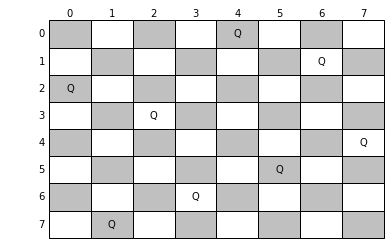

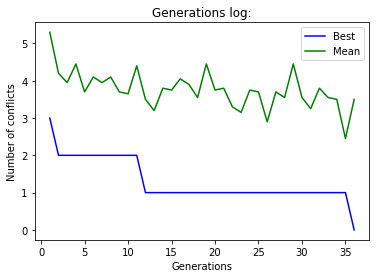

In [16]:
board_size = 8
mutation_chance = 0.8
population_size = 20
generations = 100
crossover_point = 3
children_number = 15

solution_found, best_solution, log, mean_log = solve_n_queens_problem(board_size, generations, population_size, 
                                                            children_number, mutation_chance, crossover_point)

show_results(solution_found, best_solution, log, mean_log)

## n = 20

Solution found!



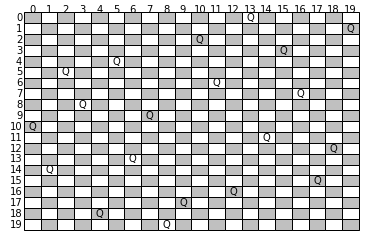

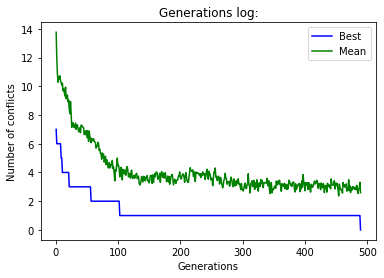

In [17]:
board_size = 20
mutation_chance = 0.3
population_size = 100
generations = 500
crossover_point = 12
children_number = 60

solution_found, best_solution, log, mean_log = solve_n_queens_problem(board_size, generations, population_size, 
                                                            children_number, mutation_chance, crossover_point)

show_results(solution_found, best_solution, log, mean_log)

## n = 50
_(it may take a while, about 5 minutes)_

Solution found!



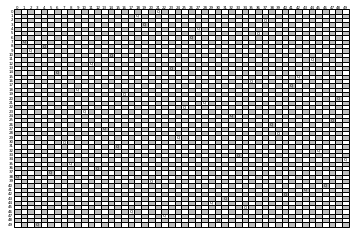

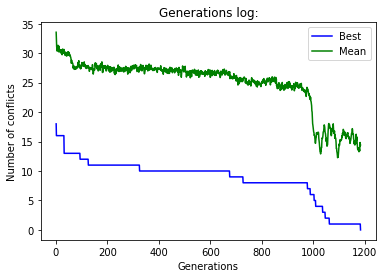

In [18]:
board_size = 50
mutation_chance = 0.3
population_size = 300
generations = 3000
crossover_point = 32
children_number = 260

solution_found, best_solution, log, mean_log = solve_n_queens_problem(board_size, generations, population_size, 
                                                            children_number, mutation_chance, crossover_point)

show_results(solution_found, best_solution, log, mean_log)

## n = 100

After 7h a solution with 25 conflicts was found using the following parameters:

``board_size = 100
mutation_chance = 0.3
population_size = 400
generations = 10000
crossover_point = 42
children_number = 360
``


Below is shown the application with few generations

Solution not found :(



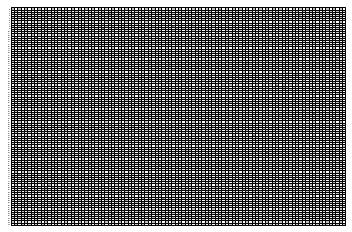

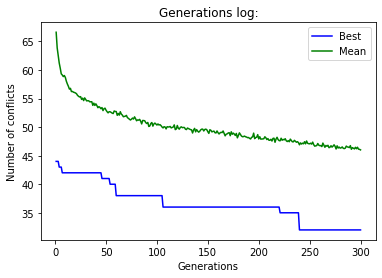

In [20]:
board_size = 100
mutation_chance = 0.3
population_size = 400
generations = 300
crossover_point = 42
children_number = 120

solution_found, best_solution, log, mean_log = solve_n_queens_problem(board_size, generations, population_size, 
                                                            children_number, mutation_chance, crossover_point)

show_results(solution_found, best_solution, log, mean_log)